# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from tensorflow.keras import Sequential, layers
from tensorflow.keras.callbacks import EarlyStopping

2023-08-08 15:45:51.568600: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Data

In [2]:
# Get data files
#!wget https://cdn.freecodecamp.org/project-data/sms/train-data.tsv
#!wget https://cdn.freecodecamp.org/project-data/sms/valid-data.tsv


In [3]:
# Create folder for data
# !mkdir data
# !mv train-data.tsv valid-data.tsv data

In [4]:
# Setting path to data
train_file_path = "data/train-data.tsv"
test_file_path = "data/valid-data.tsv"

In [5]:
# Create data frames from files
train_data = pd.read_csv(train_file_path, 
                         sep="\t", 
                         header=None, 
                         names=["type", "message"])

test_data = pd.read_csv(test_file_path, 
                        sep="\t", 
                        header=None, 
                        names = ["type", "message"])

In [6]:
train_data

,type,message
0,ham,ahhhh...just woken up!had a bad dream about u ...
1,ham,you can never do nothing
2,ham,"now u sound like manky scouse boy steve,like! ..."
3,ham,mum say we wan to go then go... then she can s...
4,ham,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,ham,just woke up. yeesh its late. but i didn't fal...
4175,ham,what do u reckon as need 2 arrange transport i...
4176,spam,free entry into our £250 weekly competition ju...
4177,spam,-pls stop bootydelious (32/f) is inviting you ...


In [7]:
test_data

,type,message
0,ham,i am in hospital da. . i will return home in e...
1,ham,"not much, just some textin'. how bout you?"
2,ham,i probably won't eat at all today. i think i'm...
3,ham,don‘t give a flying monkeys wot they think and...
4,ham,who are you seeing?
...,...,...
1387,ham,true dear..i sat to pray evening and felt so.s...
1388,ham,"what will we do in the shower, baby?"
1389,ham,where are you ? what are you doing ? are yuou ...
1390,spam,ur cash-balance is currently 500 pounds - to m...


In [8]:
# Change labels from text to numeric
train_data["type"] = train_data["type"].replace(["ham", "spam"], [0, 1])
test_data["type"] = test_data["type"].replace(["ham", "spam"], [0, 1])

In [9]:
train_data

,type,message
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...
4176,1,free entry into our £250 weekly competition ju...
4177,1,-pls stop bootydelious (32/f) is inviting you ...


In [10]:
test_data

,type,message
0,0,i am in hospital da. . i will return home in e...
1,0,"not much, just some textin'. how bout you?"
2,0,i probably won't eat at all today. i think i'm...
3,0,don‘t give a flying monkeys wot they think and...
4,0,who are you seeing?
...,...,...
1387,0,true dear..i sat to pray evening and felt so.s...
1388,0,"what will we do in the shower, baby?"
1389,0,where are you ? what are you doing ? are yuou ...
1390,1,ur cash-balance is currently 500 pounds - to m...


# Data exploration

In [11]:
train_data.describe()

,type
count,4179.000000
mean,0.134003
std,0.340697
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [39]:
# Check data types
train_data.dtypes

type        int64
message    object
dtype: object

In [12]:
# Check NaN
train_data.isna().sum()

type       0
message    0
dtype: int64

In [13]:
# Check duplicated rows
train_data.duplicated().sum()

244

There are duplicated rows but they may carry information, so keep them. 

In [42]:
# Check maximum length in train and test data frames
print(f"""Maximum length for training data: {train_data.message.str.len().max()}
Maximum length for testing data: {test_data.message.str.len().max()}""")

Maximum length for training data: 910
Maximum length for testing data: 482


In [15]:
# Check data balancing for training data
train_data.type.value_counts()

0    3619
1     560
Name: type, dtype: int64

In [16]:
# Check data balancing for testing data
test_data.type.value_counts()

0    1205
1     187
Name: type, dtype: int64

# Rebalance training data

In [17]:
# Split ham and spam data
ham_train_data = train_data[train_data["type"] == 0]
spam_train_data = train_data[train_data["type"] != 0]

In [18]:
ham_train_data

,type,message
0,0,ahhhh...just woken up!had a bad dream about u ...
1,0,you can never do nothing
2,0,"now u sound like manky scouse boy steve,like! ..."
3,0,mum say we wan to go then go... then she can s...
4,0,never y lei... i v lazy... got wat? dat day ü ...
...,...,...
4172,0,"not yet chikku..going to room nw, i'm in bus.."
4173,0,"tell you what, if you make a little spreadshee..."
4174,0,just woke up. yeesh its late. but i didn't fal...
4175,0,what do u reckon as need 2 arrange transport i...


In [19]:
spam_train_data

,type,message
8,1,urgent! call 09066350750 from your landline. y...
16,1,bored housewives! chat n date now! 0871750.77....
20,1,message important information for o2 user. tod...
37,1,free for 1st week! no1 nokia tone 4 ur mobile ...
39,1,you have 1 new voicemail. please call 08719181503
...,...,...
4164,1,free msg: single? find a partner in your area!...
4165,1,free2day sexy st george's day pic of jordan!tx...
4167,1,you are a winner you have been specially selec...
4176,1,free entry into our £250 weekly competition ju...


In [20]:
# Apply undersample on majority class
ham_train_data_undersampled = ham_train_data.sample(n = len(spam_train_data),
                                                    random_state=13)

In [21]:
# Concat new ham data with spam data
new_train_data = pd.concat([ham_train_data_undersampled, spam_train_data])

In [22]:
# Apply shuffle on fresh data
new_train_data = new_train_data.sample(frac=1)

In [23]:
new_train_data

,type,message
1176,0,ok lor but not too early. me still having proj...
1350,1,win the newest “harry potter and the order of ...
1905,1,you won't believe it but it's true. it's incre...
914,0,man this bus is so so so slow. i think you're ...
143,1,congratulations you've won. you're a winner in...
...,...,...
157,1,you are a winner u have been specially selecte...
281,1,we tried to call you re your reply to our sms ...
3279,1,this message is brought to you by gmw ltd. and...
636,0,i'm so in love with you. i'm excited each day ...


# Data preprocessing

In [24]:
# Set data for tensorflow
X_train = new_train_data["message"].values
y_train = new_train_data["type"].values
X_test = test_data["message"].values
y_test = test_data["type"].values

In [25]:
train_data_from_tensor_slices = tf.data.Dataset.from_tensor_slices(
    (X_train, 
    y_train))

In [26]:
test_data_from_tensor_slices = tf.data.Dataset.from_tensor_slices(
    (X_test, 
    y_test))

In [27]:
BUFFER_SIZE = len(new_train_data)
BATCH_SIZE = 64

In [28]:
# Prepare and shuffle data from datasets for fitting
train_data_from_tensor_slices = train_data_from_tensor_slices.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data_from_tensor_slices = test_data_from_tensor_slices.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Model

In [29]:
# Create a vectorizer layer to transform characters into int
vectorizer_layer = layers.TextVectorization(output_mode="int",
                                            output_sequence_length=910
)

vectorizer_layer.adapt(train_data_from_tensor_slices.map(lambda text, label: text))

In [30]:
model = Sequential()
model.add(vectorizer_layer)
model.add(layers.Embedding(len(vectorizer_layer.get_vocabulary()), 32))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=False)))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 910)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 910, 32)           133088    
                                                                 
 bidirectional (Bidirection  (None, 256)               164864    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 64)                16448     
                                                                 
 dense_1 (Dense)             (None, 1)                 6

In [32]:
# Create early stopping to avoid useless epochs
es = EarlyStopping(patience = 3, restore_best_weights=True, monitor= "val_loss")

In [33]:
history = model.fit(train_data_from_tensor_slices,
          validation_data = test_data_from_tensor_slices,
          epochs=20, 
          callbacks=[es])

Epoch 1/20


18/18 [==============================] - 65s 3s/step - loss: 0.6391 - accuracy: 0.6438 - val_loss: 0.6809 - val_accuracy: 0.5769
Epoch 2/20
18/18 [==============================] - 72s 4s/step - loss: 0.4072 - accuracy: 0.8527 - val_loss: 0.1558 - val_accuracy: 0.9576
Epoch 3/20
18/18 [==============================] - 66s 4s/step - loss: 0.1557 - accuracy: 0.9527 - val_loss: 0.1502 - val_accuracy: 0.9569
Epoch 4/20
18/18 [==============================] - 59s 3s/step - loss: 0.0570 - accuracy: 0.9812 - val_loss: 0.1409 - val_accuracy: 0.9504
Epoch 5/20
18/18 [==============================] - 58s 3s/step - loss: 0.0252 - accuracy: 0.9929 - val_loss: 0.1108 - val_accuracy: 0.9626
Epoch 6/20
18/18 [==============================] - 52s 3s/step - loss: 0.0120 - accuracy: 0.9973 - val_loss: 0.0974 - val_accuracy: 0.9727
Epoch 7/20
18/18 [==============================] - 61s 3s/step - loss: 0.0065 - accuracy: 0.9982 - val_loss: 0.1333 - val_accuracy: 0.9626
Epoch 8/20
18/18 [=============

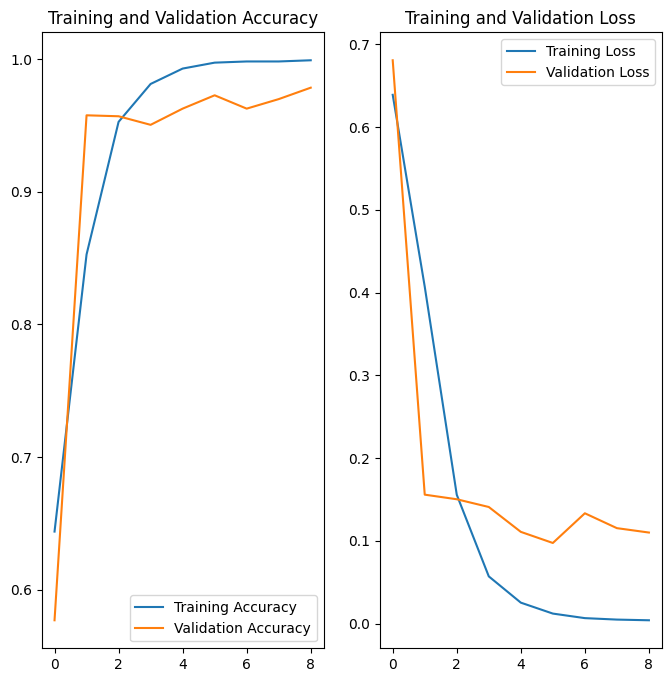

In [34]:
# Plot learning curves
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs_range = range(len(history.epoch))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

# Test on new data

In [35]:
X_new = "sale today! to stop texts call 98912460324"

y_new = model.predict([X_new])
prediction = y_new[0][0]
print(f"{prediction}, {'ham' if prediction <= 0.5 else 'spam'}")

1/1 [==============================] - 1s 1s/step
0.9204224348068237, spam


In [36]:
# Function to predict messages based on model
def predict_message(pred_text):
    """
    Takes text from SMS and return a list with confidence of ham or spam 
    and associated label
    """
    y_new = model.predict([pred_text])
    prediction = y_new[0][0]
    
    return [prediction, 'ham' if prediction <= 0.5 else 'spam']

In [37]:
pred_text = "how are you doing today?"
prediction = predict_message(pred_text)
print(prediction)

pred_text_2 = "our new mobile video service is live. just install on your phone to start watching."
prediction_2 = predict_message(pred_text_2)
print(prediction_2)

1/1 [==============================] - 0s 159ms/step
[0.004972158, 'ham']
1/1 [==============================] - 0s 129ms/step
[0.9996856, 'spam']


In [38]:
# As it's part of a free code camp challenge we have to try and new data
def test_predictions():
  test_messages = ["how are you doing today",
                   "sale today! to stop texts call 98912460324",
                   "i dont want to go. can we try it a different day? available sat",
                   "our new mobile video service is live. just install on your phone to start watching.",
                   "you have won £1000 cash! call to claim your prize.",
                   "i'll bring it tomorrow. don't forget the milk.",
                   "wow, is your arm alright. that happened to me one time too"
                  ]

  test_answers = ["ham", "spam", "ham", "spam", "spam", "ham", "ham"]
  passed = True

  for msg, ans in zip(test_messages, test_answers):
    prediction = predict_message(msg)
    if prediction[1] != ans:
      passed = False

  if passed:
    print("You passed the challenge. Great job!")
  else:
    print("You haven't passed yet. Keep trying.")

test_predictions()

1/1 [==============================] - 0s 98ms/step
You passed the challenge. Great job!
